In [1]:
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
import librosa
import pandas as pd
print("✅ All dependencies loaded successfully!")


c:\Users\rushi\.conda\envs\yamnet\Lib\site-packages\tensorflow_hub\__init__.py:61: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import parse_version



✅ All dependencies loaded successfully!


In [2]:


# Path to the downloaded YAMNet model
yamnet_model_path =r'C:\Users\rushi\OneDrive\Desktop\yamnet\yamnet-tensorflow2-yamnet-v1'

# Load the pretrained YAMNet model
yamnet_model = tf.saved_model.load(yamnet_model_path)

print("✅ YAMNet model loaded successfully!")


✅ YAMNet model loaded successfully!


In [3]:
import xml.etree.ElementTree as ET
import os

xml_sample = r"C:\Users\rushi\OneDrive\Desktop\yamnet\mivia_db4\MIVIA_DB4_dist\training\00001.xml"

tree = ET.parse(xml_sample)
root = tree.getroot()

# Print root tag
print("Root:", root.tag)

# Print all tags and attributes for inspection
for elem in root.iter():
    print(elem.tag, elem.attrib)


Root: root
root {'xml_tb_version': '3.1', 'idx': '1', 'type': 'struct', 'size': '1 1'}
events {'idx': '1', 'type': 'cell', 'size': '1 33'}
item {'idx': '1', 'type': 'struct', 'size': '1 1'}
PATHNAME {'idx': '1', 'type': 'char', 'size': '1 14'}
CLASS_ID {'idx': '1', 'type': 'double', 'size': '1 1'}
CLASS_NAME {'idx': '1', 'type': 'char', 'size': '1 14'}
STARTSECOND {'idx': '1', 'type': 'double', 'size': '1 1'}
ENDSECOND {'idx': '1', 'type': 'double', 'size': '1 1'}
item {'idx': '2', 'type': 'struct', 'size': '1 1'}
PATHNAME {'idx': '1', 'type': 'char', 'size': '1 16'}
CLASS_ID {'idx': '1', 'type': 'double', 'size': '1 1'}
CLASS_NAME {'idx': '1', 'type': 'char', 'size': '1 16'}
STARTSECOND {'idx': '1', 'type': 'double', 'size': '1 1'}
ENDSECOND {'idx': '1', 'type': 'double', 'size': '1 1'}
item {'idx': '3', 'type': 'struct', 'size': '1 1'}
PATHNAME {'idx': '1', 'type': 'char', 'size': '1 14'}
CLASS_ID {'idx': '1', 'type': 'double', 'size': '1 1'}
CLASS_NAME {'idx': '1', 'type': 'char', '

In [4]:
import os
import xml.etree.ElementTree as ET

xml_dir = r"C:\Users\rushi\OneDrive\Desktop\yamnet\mivia_db4\MIVIA_DB4_dist\training"
sound_dir = os.path.join(xml_dir, "sounds")

data = []

for xml_file in os.listdir(xml_dir):
    if xml_file.endswith(".xml"):
        xml_path = os.path.join(xml_dir, xml_file)
        tree = ET.parse(xml_path)
        root = tree.getroot()
        
        # Loop through all event items
        for item in root.findall(".//item"):
            try:
                class_name_elem = item.find("CLASS_NAME")
                start_elem = item.find("STARTSECOND")
                end_elem = item.find("ENDSECOND")
                path_elem = item.find("PATHNAME")

                if class_name_elem is not None and start_elem is not None and end_elem is not None:
                    label = class_name_elem.text.strip() if class_name_elem.text else "Unknown"
                    start = float(start_elem.text.strip()) if start_elem.text else 0.0
                    end = float(end_elem.text.strip()) if end_elem.text else 0.0
                    
                    # Construct corresponding WAV path
                    wav_file = os.path.basename(xml_file).replace(".xml", ".wav")
                    wav_path = os.path.join(sound_dir, wav_file)
                    
                    data.append((wav_path, label, start, end))
            except Exception as e:
                print(f"Error in {xml_file}: {e}")

print(f"✅ Total events found: {len(data)}")
print("Sample entries:")
for d in data[:5]:
    print(d)


✅ Total events found: 2100
Sample entries:
('C:\\Users\\rushi\\OneDrive\\Desktop\\yamnet\\mivia_db4\\MIVIA_DB4_dist\\training\\sounds\\00001.wav', 'glass/0009.wav', 4.81175, 5.86571875)
('C:\\Users\\rushi\\OneDrive\\Desktop\\yamnet\\mivia_db4\\MIVIA_DB4_dist\\training\\sounds\\00001.wav', 'screams/0004.wav', 9.239875, 10.19884375)
('C:\\Users\\rushi\\OneDrive\\Desktop\\yamnet\\mivia_db4\\MIVIA_DB4_dist\\training\\sounds\\00001.wav', 'glass/0053.wav', 15.688, 16.68196875)
('C:\\Users\\rushi\\OneDrive\\Desktop\\yamnet\\mivia_db4\\MIVIA_DB4_dist\\training\\sounds\\00001.wav', 'screams/0017.wav', 21.6440625, 22.57403125)
('C:\\Users\\rushi\\OneDrive\\Desktop\\yamnet\\mivia_db4\\MIVIA_DB4_dist\\training\\sounds\\00001.wav', 'screams/0001.wav', 27.309125, 28.40909375)


In [5]:
import os
import xml.etree.ElementTree as ET

xml_dir = r"C:\Users\rushi\OneDrive\Desktop\yamnet\mivia_db4\MIVIA_DB4_dist\training"
sound_dir = os.path.join(xml_dir, "sounds")

data = []

for xml_file in os.listdir(xml_dir):
    if xml_file.endswith(".xml"):
        xml_path = os.path.join(xml_dir, xml_file)
        tree = ET.parse(xml_path)
        root = tree.getroot()
        
        for item in root.findall(".//item"):
            try:
                class_name_elem = item.find("CLASS_NAME")
                start_elem = item.find("STARTSECOND")
                end_elem = item.find("ENDSECOND")

                if class_name_elem is not None and start_elem is not None and end_elem is not None:
                    # Extract only the folder name before '/'
                    raw_label = class_name_elem.text.strip() if class_name_elem.text else "Unknown"
                    label = raw_label.split('/')[0]  # e.g. "glass/0009.wav" → "glass"

                    start = float(start_elem.text.strip()) if start_elem.text else 0.0
                    end = float(end_elem.text.strip()) if end_elem.text else 0.0
                    
                    wav_file = os.path.basename(xml_file).replace(".xml", ".wav")
                    wav_path = os.path.join(sound_dir, wav_file)
                    
                    data.append((wav_path, label, start, end))
            except Exception as e:
                print(f"Error in {xml_file}: {e}")

print(f"✅ Total events found: {len(data)}")
print("Unique classes:", set([d[1] for d in data]))
print("Sample entries:")
for d in data[:5]:
    print(d)


✅ Total events found: 2100
Unique classes: {'glass', 'screams', 'gunshots'}
Sample entries:
('C:\\Users\\rushi\\OneDrive\\Desktop\\yamnet\\mivia_db4\\MIVIA_DB4_dist\\training\\sounds\\00001.wav', 'glass', 4.81175, 5.86571875)
('C:\\Users\\rushi\\OneDrive\\Desktop\\yamnet\\mivia_db4\\MIVIA_DB4_dist\\training\\sounds\\00001.wav', 'screams', 9.239875, 10.19884375)
('C:\\Users\\rushi\\OneDrive\\Desktop\\yamnet\\mivia_db4\\MIVIA_DB4_dist\\training\\sounds\\00001.wav', 'glass', 15.688, 16.68196875)
('C:\\Users\\rushi\\OneDrive\\Desktop\\yamnet\\mivia_db4\\MIVIA_DB4_dist\\training\\sounds\\00001.wav', 'screams', 21.6440625, 22.57403125)
('C:\\Users\\rushi\\OneDrive\\Desktop\\yamnet\\mivia_db4\\MIVIA_DB4_dist\\training\\sounds\\00001.wav', 'screams', 27.309125, 28.40909375)


In [6]:
import glob, os

base_path = r"C:\Users\rushi\OneDrive\Desktop\yamnet\mivia_db4\MIVIA_DB4_dist\training"
for path in glob.glob(os.path.join(base_path, "**", "*.wav"), recursive=True):
    print(path)
    break


C:\Users\rushi\OneDrive\Desktop\yamnet\mivia_db4\MIVIA_DB4_dist\training\sounds\00001_00.wav


In [7]:
import os
import librosa
import soundfile as sf
import glob

output_root = r"C:\Users\rushi\OneDrive\Desktop\yamnet\mivia_prepared"
os.makedirs(output_root, exist_ok=True)

for wav_path, label, start, end in data:
    try:
        # Base name (e.g., 00001)
        base_name = os.path.basename(wav_path).replace(".wav", "")
        sound_dir = os.path.dirname(wav_path)

        # Try to find the actual file (e.g., 00001_00.wav)
        possible_files = glob.glob(os.path.join(sound_dir, f"{base_name}_*.wav"))
        if not possible_files:
            print(f"⚠️ No matching file for {base_name}.wav")
            continue

        real_wav_path = possible_files[0]  # take first match

        # Load and slice the audio
        y, sr = librosa.load(real_wav_path, sr=16000)
        start_sample = int(start * sr)
        end_sample = int(end * sr)
        clip = y[start_sample:end_sample]

        # Save clipped file
        label_dir = os.path.join(output_root, label)
        os.makedirs(label_dir, exist_ok=True)
        filename = f"{base_name}_{int(start*1000)}.wav"
        sf.write(os.path.join(label_dir, filename), clip, sr)

    except Exception as e:
        print(f"❌ Error processing {wav_path}: {e}")

print("✅ Audio event extraction completed successfully!")


✅ Audio event extraction completed successfully!


In [8]:
import os
import tensorflow as tf
import numpy as np
import librosa
from sklearn.model_selection import train_test_split

# -----------------------------
# 1️⃣ Paths and Basic Setup
# -----------------------------
yamnet_model_path = r"C:\Users\rushi\OneDrive\Desktop\yamnet\yamnet-tensorflow2-yamnet-v1"
data_root = r"C:\Users\rushi\OneDrive\Desktop\yamnet\mivia_prepared"

# Check available class folders
class_names = sorted(os.listdir(data_root))
print("Detected classes:", class_names)

# -----------------------------
# 2️⃣ Load YAMNet Model (Local)
# -----------------------------
reloaded_model = tf.saved_model.load(yamnet_model_path)
yamnet_model = reloaded_model.signatures['serving_default']
print("✅ YAMNet model loaded successfully!")

# -----------------------------
# 3️⃣ Audio Loading & Preprocessing
# -----------------------------
def load_audio(filepath):
    waveform, sr = librosa.load(filepath, sr=16000)
    # Pad or truncate to 1 second (16,000 samples)
    if len(waveform) < 16000:
        waveform = np.pad(waveform, (0, 16000 - len(waveform)))
    else:
        waveform = waveform[:16000]
    return waveform

# -----------------------------
# 4️⃣ Load Audio Dataset
# -----------------------------
X, y = [], []
for label_idx, label in enumerate(class_names):
    folder = os.path.join(data_root, label)
    for file in os.listdir(folder):
        if file.endswith(".wav"):
            path = os.path.join(folder, file)
            X.append(load_audio(path))
            y.append(label_idx)

X = np.array(X)
y = np.array(y)
print(f"✅ Loaded {len(X)} audio clips for training ({len(class_names)} classes).")

# -----------------------------
# 5️⃣ Split Train/Test Sets
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)
print(f"Training clips: {len(X_train)}, Testing clips: {len(X_test)}")

# -----------------------------
# 6️⃣ Extract YAMNet Embeddings
# -----------------------------
def extract_embedding(waveform):
    waveform = tf.constant(waveform, dtype=tf.float32)
    # Pass as named argument according to model signature
    result = yamnet_model(waveform=waveform)
    embeddings = result['output_1']  # YAMNet's embedding output
    return tf.reduce_mean(embeddings, axis=0).numpy()

print("⏳ Extracting YAMNet embeddings...")
train_embeddings = np.array([extract_embedding(w) for w in X_train])
test_embeddings = np.array([extract_embedding(w) for w in X_test])
print("✅ Embeddings extracted successfully!")

# -----------------------------
# 7️⃣ Train Custom Classifier
# -----------------------------
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(1024,)),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(len(class_names), activation='softmax')
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(1e-4),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

print("⏳ Training classifier...")
history = model.fit(
    train_embeddings, y_train,
    validation_data=(test_embeddings, y_test),
    epochs=25,
    batch_size=32,
    verbose=1
)

print("✅ Training completed!")







Detected classes: ['glass', 'gunshots', 'screams']
✅ YAMNet model loaded successfully!
✅ Loaded 2100 audio clips for training (3 classes).
Training clips: 1680, Testing clips: 420
⏳ Extracting YAMNet embeddings...
✅ Embeddings extracted successfully!
⏳ Training classifier...
Epoch 1/25
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6607 - loss: 0.7411 - val_accuracy: 0.7952 - val_loss: 0.6387
Epoch 2/25
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8315 - loss: 0.5417 - val_accuracy: 0.8167 - val_loss: 0.5286
Epoch 3/25
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8554 - loss: 0.4441 - val_accuracy: 0.8310 - val_loss: 0.4488
Epoch 4/25
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8708 - loss: 0.3768 - val_accuracy: 0.8405 - val_loss: 0.3960
Epoch 5/25
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8899 - loss: 0.3335 - val_accuracy: 0.8524 - val_loss: 0.3588
Epoch 6/25
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9024 - loss: 0.3023 - val_accu

In [9]:
# -----------------------------
# 8️⃣ Evaluate and Save
# -----------------------------
loss, acc = model.evaluate(test_embeddings, y_test)
print(f"✅ Test accuracy: {acc*100:.2f}%")



14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9167 - loss: 0.2222 
✅ Test accuracy: 91.67%


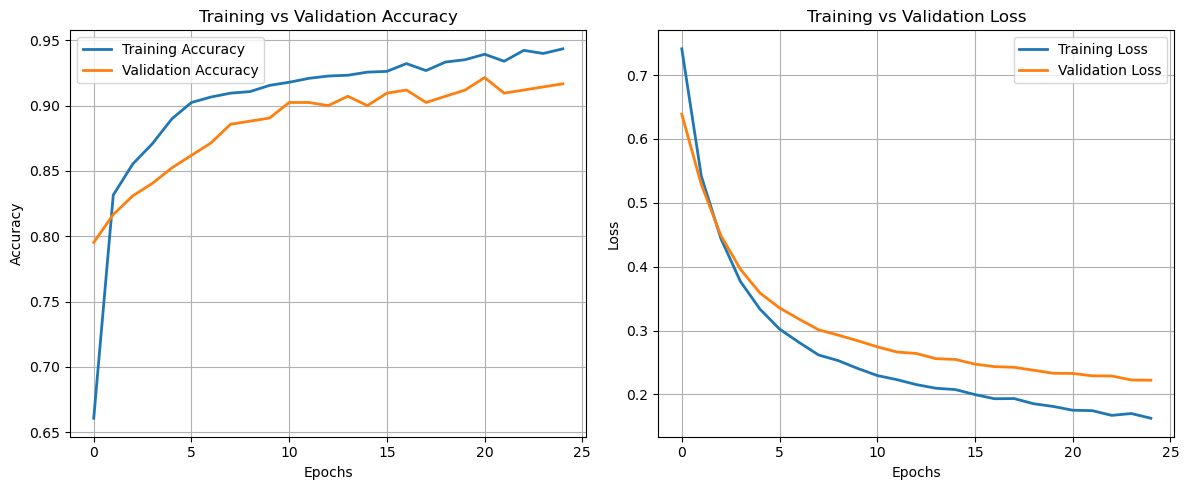

In [10]:
import matplotlib.pyplot as plt

# -----------------------------
# 📈 Plot Training & Validation Metrics
# -----------------------------
plt.figure(figsize=(12, 5))

# Accuracy Curve
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy', linewidth=2)
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', linewidth=2)
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Loss Curve
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss', linewidth=2)
plt.plot(history.history['val_loss'], label='Validation Loss', linewidth=2)
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


In [11]:
# -----------------------------
# 8️⃣ Save Trained Model
# -----------------------------
output_model_path = r"C:\Users\rushi\OneDrive\Desktop\yamnet\fine_tuned_yamnet_classifier.h5"
model.save(output_model_path)
print(f"🎉 Fine-tuned classifier saved at: {output_model_path}")

🎉 Fine-tuned classifier saved at: C:\Users\rushi\OneDrive\Desktop\yamnet\fine_tuned_yamnet_classifier.h5


Detected classes: ['glass', 'gunshots', 'screams']
Extracting test embeddings... ⏳


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step

📊 Classification Report:

              precision    recall  f1-score   support

       glass     0.8784    0.9286    0.9028       140
    gunshots     0.9621    0.9071    0.9338       140
     screams     0.9143    0.9143    0.9143       140

    accuracy                         0.9167       420
   macro avg     0.9183    0.9167    0.9170       420
weighted avg     0.9183    0.9167    0.9170       420



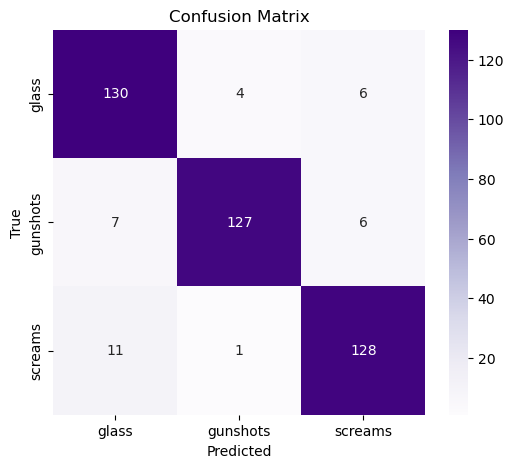

In [13]:
import os
import numpy as np
import tensorflow as tf
import librosa
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# -----------------------------
# Paths
# -----------------------------
yamnet_model_path = r"C:\Users\rushi\OneDrive\Desktop\yamnet\yamnet-tensorflow2-yamnet-v1"
data_root = r"C:\Users\rushi\OneDrive\Desktop\yamnet\mivia_prepared"
classifier_path = r"C:\Users\rushi\OneDrive\Desktop\yamnet\fine_tuned_yamnet_classifier.h5"

# Load classes
class_names = sorted(os.listdir(data_root))
print("Detected classes:", class_names)

# -----------------------------
# Load YAMNet model
# -----------------------------
reloaded_model = tf.saved_model.load(yamnet_model_path)
yamnet_model = reloaded_model.signatures['serving_default']

# -----------------------------
# Audio preprocessing
# -----------------------------
def load_audio(filepath):
    waveform, sr = librosa.load(filepath, sr=16000)
    waveform = waveform[:16000]
    if len(waveform) < 16000:
        waveform = np.pad(waveform, (0, 16000 - len(waveform)))
    return waveform

# -----------------------------
# Load dataset & split
# -----------------------------
X, y = [], []
for label_idx, label in enumerate(class_names):
    folder = os.path.join(data_root, label)
    for file in os.listdir(folder):
        if file.endswith(".wav"):
            X.append(load_audio(os.path.join(folder, file)))
            y.append(label_idx)

X = np.array(X)
y = np.array(y)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# -----------------------------
# Extract YAMNet embeddings
# -----------------------------
def extract_embedding(waveform):
    waveform = tf.constant(waveform, dtype=tf.float32)
    waveform = tf.reshape(waveform, [-1])  # Flatten to 1D
    result = yamnet_model(waveform=waveform)  # ✅ Correct call
    embeddings = result['output_1']           # YAMNet's 1024-dim embedding output
    return tf.reduce_mean(embeddings, axis=0).numpy()

print("Extracting test embeddings... ⏳")
test_embeddings = np.array([extract_embedding(w) for w in X_test])

# -----------------------------
# Load fine-tuned classifier
# -----------------------------
classifier = tf.keras.models.load_model(classifier_path)

# -----------------------------
# Evaluate precision, recall, F1
# -----------------------------
y_pred_probs = classifier.predict(test_embeddings)
y_pred = np.argmax(y_pred_probs, axis=1)

print("\n📊 Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=class_names, digits=4))

# -----------------------------
# Confusion matrix
# -----------------------------
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()



In [14]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Precision: 0.9182617682617682
Recall: 0.9166666666666666
F1 Score: 0.9169623404917524


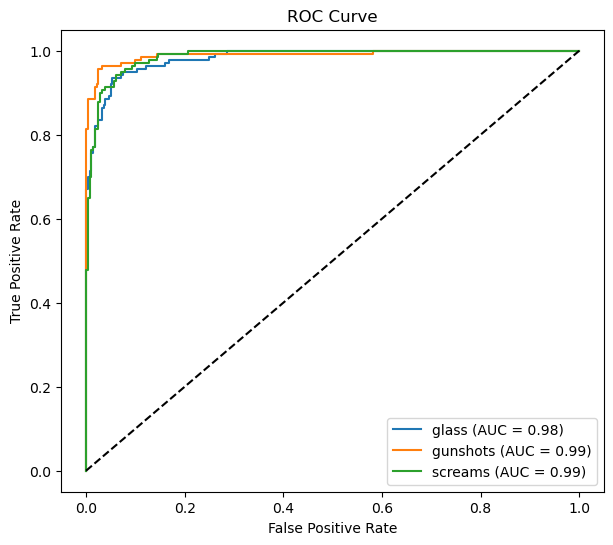

In [15]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

# Convert to one-hot
y_test_bin = label_binarize(y_test, classes=np.arange(len(class_names)))
n_classes = y_test_bin.shape[1]

plt.figure(figsize=(7,6))

for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_probs[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{class_names[i]} (AUC = {roc_auc:.2f})")

plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


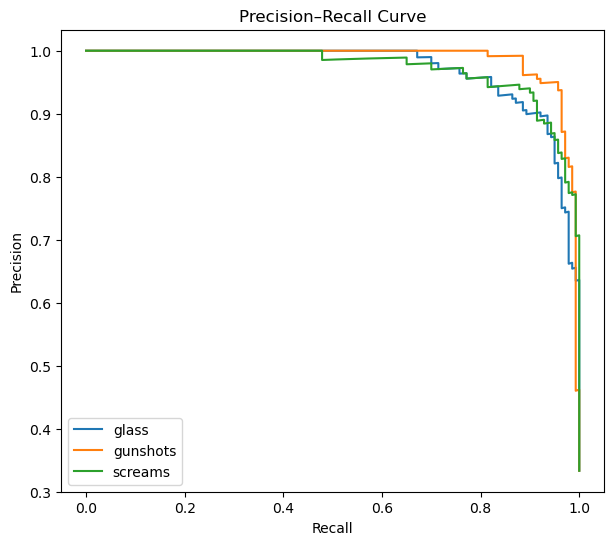

In [16]:
from sklearn.metrics import precision_recall_curve

plt.figure(figsize=(7,6))

for i in range(n_classes):
    precision_c, recall_c, _ = precision_recall_curve(y_test_bin[:, i], y_pred_probs[:, i])
    plt.plot(recall_c, precision_c, label=f"{class_names[i]}")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision–Recall Curve")
plt.legend()
plt.show()


In [ ]:
"""import numpy as np
import tensorflow as tf
import sounddevice as sd
import time

# -----------------------------
# Paths & setup
# -----------------------------
yamnet_model_path = r"C:\Users\rushi\OneDrive\Desktop\yamnet\yamnet-tensorflow2-yamnet-v1"
classifier_path = r"C:\Users\rushi\OneDrive\Desktop\yamnet\fine_tuned_yamnet_classifier.h5"
class_names = ['glass', 'gunshots', 'screams']
confidence_threshold = 0.8  # lower to catch short bursts
sr = 16000
window_size = 1.0  # 1-second window
hop_size = 0.25    # 0.25-second hop
chunk_duration = 2 # record 2 seconds per iteration

# -----------------------------
# Load models
# -----------------------------
print("Loading models...")
reloaded_model = tf.saved_model.load(yamnet_model_path)
yamnet_model = reloaded_model.signatures['serving_default']
classifier = tf.keras.models.load_model(classifier_path)
print("✅ Models loaded successfully!")

# -----------------------------
# Helper: extract embedding
# -----------------------------
def extract_embedding(waveform):
    waveform = np.array(waveform, dtype=np.float32)
    waveform = waveform / np.max(np.abs(waveform) + 1e-6)  # normalize [-1,1]
    waveform = tf.constant(waveform, dtype=tf.float32)
    waveform = tf.reshape(waveform, [-1])
    result = yamnet_model(waveform=waveform)
    embeddings = result['output_1']
    return tf.reduce_mean(embeddings, axis=0).numpy()

# -----------------------------
# Predict on a chunk using sliding windows
# -----------------------------
def predict_chunk(waveform):
    window_samples = int(window_size * sr)
    hop_samples = int(hop_size * sr)
    preds_list = []

    for start in range(0, len(waveform) - window_samples + 1, hop_samples):
        window_wave = waveform[start:start + window_samples]

        # Skip windows only if completely silent
        if np.max(np.abs(window_wave)) < 1e-5:
            continue

        embedding = extract_embedding(window_wave)
        preds = classifier.predict(np.expand_dims(embedding, axis=0), verbose=0)[0]
        preds_list.append(preds)

    if len(preds_list) == 0:
        return "normal sound", 0

    # Take max confidence across all windows
    max_preds = np.max(preds_list, axis=0)
    max_conf = np.max(max_preds)
    pred_class = class_names[np.argmax(max_preds)] if max_conf >= confidence_threshold else "normal sound"

    return pred_class, max_conf

# -----------------------------
# Continuous live detection
# -----------------------------
print("\n🎙️ Live detection started! Press Ctrl+C to stop.\n")
try:
    while True:
        # Record chunk
        audio = sd.rec(int(chunk_duration * sr), samplerate=sr, channels=1, dtype='float32')
        sd.wait()
        waveform = np.squeeze(audio)

        # Predict using sliding windows
        pred_class, conf = predict_chunk(waveform)

        # Print result
        print(f"🔊 Detected: {pred_class.upper()} | Confidence: {conf*100:.2f}%")

        time.sleep(0.1)

except KeyboardInterrupt:
    print("\n🛑 Live detection stopped.")






"""


Loading models...


✅ Models loaded successfully!

🎙️ Live detection started! Press Ctrl+C to stop.

🔊 Detected: GUNSHOTS | Confidence: 95.36%
🔊 Detected: SCREAMS | Confidence: 96.50%
🔊 Detected: GUNSHOTS | Confidence: 89.43%
🔊 Detected: SCREAMS | Confidence: 85.25%
🔊 Detected: NORMAL SOUND | Confidence: 74.22%
🔊 Detected: GUNSHOTS | Confidence: 96.83%
🔊 Detected: NORMAL SOUND | Confidence: 76.07%
🔊 Detected: SCREAMS | Confidence: 89.26%
🔊 Detected: SCREAMS | Confidence: 99.03%
🔊 Detected: SCREAMS | Confidence: 95.39%
🔊 Detected: SCREAMS | Confidence: 98.05%
🔊 Detected: SCREAMS | Confidence: 96.92%
🔊 Detected: GUNSHOTS | Confidence: 85.86%
🔊 Detected: GUNSHOTS | Confidence: 91.45%
🔊 Detected: SCREAMS | Confidence: 95.83%
🔊 Detected: SCREAMS | Confidence: 93.30%
🔊 Detected: SCREAMS | Confidence: 87.36%
🔊 Detected: SCREAMS | Confidence: 86.55%
🔊 Detected: SCREAMS | Confidence: 87.90%
🔊 Detected: SCREAMS | Confidence: 92.91%
🔊 Detected: SCREAMS | Confidence: 98.97%
🔊 Detected: GUNSHOTS | Confidence: 97.62%
🔊